In [2]:
############################################################################################################ DATA_SET IMPORT: LOAD MNIST
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train            = mnist.train.images, mnist.train.labels
X_validation, y_validation  = mnist.validation.images, mnist.validation.labels
X_test, y_test              = mnist.test.images, mnist.test.labels

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set: {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set: {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set: 55000 samples
Validation Set: 5000 samples
Test Set: 10000 samples


In [3]:
############################################################################################################ Using Lenet, Data makes 32x32x1 from 28x28x1
'''
The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.
However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.
In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).
You do not need to modify this section.
'''
import numpy as np
# Pad images with 0(zeros)
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


8


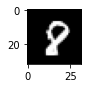

In [4]:
############################################################################################################ Visualize Random Data
import random
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [5]:
############################################################################################################ Process Data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

############################################################################################################ Setup TensorFlow
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 120

55000


In [9]:
from tensorflow.contrib.layers import flatten
import tensor_monitor_cunstom

#FOR DISPLAYING THE PARAMETER, THOSE Variables are definead out of LeNet(x)
weight_conv_layer1 = tf.Variable(tf.truncated_normal([2,2,1,6], mean=0, stddev= 0.1))
bias_conv_layer1 = tf.Variable(tf.zeros(6))

print("BEFORE: ")
functions.showVariable(weight_conv_layer1)
functions.showVariable(bias_conv_layer1)


BEFORE: 
[[[[ 0.16976318 -0.05327439 -0.03504974 -0.01200408  0.07243077
     0.02501968]]

  [[-0.13126695  0.04085186 -0.00823336  0.08894614  0.01654879
     0.19302182]]]


 [[[ 0.04298754 -0.05359545  0.11439152  0.02937382  0.03271512
     0.10632598]]

  [[ 0.05071722  0.0844657   0.11303903  0.01176086  0.08988752
     0.08517917]]]]
[0. 0. 0. 0. 0. 0.]


In [10]:
############################################################################################################ Implement LeNet-5
# VERY GOOD REFERENCE: http://yann.lecun.com/exdb/lenet/

'''
Input:
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

**Architecture
Layer 1: Convolutional. The output shape should be 28x28x6.
Activation. Your choice of activation function.
Pooling. The output shape should be 14x14x6.
Layer 2: Convolutional. The output shape should be 10x10x16.
Activation. Your choice of activation function.
Pooling. The output shape should be 5x5x16.
Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.
Layer 3: Fully Connected. This should have 120 outputs.
Activation. Your choice of activation function.
Layer 4: Fully Connected. This should have 84 outputs.
Activation. Your choice of activation function.
Layer 5: Fully Connected (Logits). This should have 10 outputs.
Output
Return the result of the 2nd fully connected layer.
'''

def LeNet(x):
    mu = 0 
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1, Output = 28x28x6.
    conv_layer1= tf.nn.conv2d(x,weight_conv_layer1, strides=[1,1,1,1], padding = 'VALID')
    conv_layer1= tf.nn.bias_add(conv_layer1, bias_conv_layer1)
    conv_layer1 = tf.nn.relu(conv_layer1) #Activation: Relu

    # Sub: Pooling. Input = 28x28x6, Output = 14x14x6
    pool_layer1 = tf.nn.max_pool(conv_layer1, ksize=[1,2,2,1], strides=[1,2,2,1], padding ='VALID')

    # Layer 2: Convolutional, Input = 14x14x6, Output = 10x10x16.
    weight_conv_layer2 = tf.Variable(tf.truncated_normal([5,5,6,16], mean=mu, stddev= sigma))
    bias_conv_layer2 = tf.Variable(tf.zeros(16))

    conv_layer2= tf.nn.conv2d(pool_layer1, weight_conv_layer2, strides=[1,1,1,1], padding='VALID')
    conv_layer2= tf.nn.bias_add(conv_layer2, bias_conv_layer2)
    conv_layer2= tf.nn.relu(conv_layer2) #Activation: Relu

    # Sub: Pooling. Input = 10x10x16, Output = 5x5x16
    pool_layer2 = tf.nn.avg_pool(conv_layer2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Flatten To Fully Connected Layer. Input = 5x5x16, Output = 400
    neural_feed = flatten(pool_layer2)

    # Layer 3: Fully Connected, Input = 400, Output = 120
    weight_fc_layer3 = tf.Variable(tf.truncated_normal([400,120], mean=mu, stddev=sigma))
    bias_fc_layer3 = tf.Variable(tf.zeros(120))

    fc_layer3 = tf.matmul(neural_feed, weight_fc_layer3)
    fc_layer3 = tf.nn.bias_add(fc_layer3, bias_fc_layer3)
    fc_layer3 = tf.nn.relu(fc_layer3)

    # Layer 4: Fully Connected, Input = 120, Output = 84
    weight_fc_layer4 = tf.Variable(tf.truncated_normal([120,84], mean=mu, stddev=sigma))
    bias_fc_layer4 = tf.Variable(tf.zeros(84))

    fc_layer4 = tf.matmul(fc_layer3, weight_fc_layer4)
    fc_layer4 = tf.nn.bias_add(fc_layer4, bias_fc_layer4)
    fc_layer4 = tf.nn.relu(fc_layer4)

    # Layer 5: Fully Connected, Input = 84, Output = 10
    weight_fc_layer5 = tf.Variable(tf.truncated_normal([84,10], mean=mu, stddev=sigma))
    bias_fc_layer5 = tf.Variable(tf.zeros(10))

    fc_layer5 = tf.matmul(fc_layer4, weight_fc_layer5)
    fc_layer5 = tf.nn.bias_add(fc_layer5, bias_fc_layer5)

    logits = fc_layer5

    return logits

print(LeNet(X_train).shape)

(55000, 10)


In [11]:
############################################################################################################ Features and Labels
'''
Train LeNet to classify MNIST data
x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels

*tf.constant, tf.Variable, tf.placeholder 차이 설명
 https://wotres.tistory.com/entry/tfconstant-tfVariable-tfplaceholder-%EC%B0%A8%EC%9D%B4
'''

x = tf.placeholder(tf.float32, (None, 32,32,1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

In [12]:
############################################################################################################ Training Pipeline
'''
Create a training pipeline that uses the model to classify MNIST data
'''
rate = 0.001
logits = LeNet(x)
Cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)
loss_operation = tf.reduce_mean(Cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [13]:
############################################################################################################ Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy/ num_examples

In [14]:
############################################################################################################ Train the MOodel
'''
Run the trainning data through the training pipeline to train the model
Before each epoch, shuffle thr trainning set.
After each epoch, measure the loss and accuracy of the validation set.
'''
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Trainnig...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset+BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_validation ,y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './lenet')
    print("Model saved")

print("AFTER: ")
functions.showVariable(weight_conv_layer1)
functions.showVariable(bias_conv_layer1)

Trainnig...

EPOCH 1 ...
Validation Accuracy = 0.951

EPOCH 2 ...
Validation Accuracy = 0.970

EPOCH 3 ...
Validation Accuracy = 0.979

EPOCH 4 ...
Validation Accuracy = 0.979

EPOCH 5 ...
Validation Accuracy = 0.987

EPOCH 6 ...
Validation Accuracy = 0.984

EPOCH 7 ...
Validation Accuracy = 0.985

EPOCH 8 ...
Validation Accuracy = 0.985

EPOCH 9 ...
Validation Accuracy = 0.987

EPOCH 10 ...
Validation Accuracy = 0.985

Model saved
AFTER: 
[[[[ 0.05756934 -0.06511106  0.1349899   0.02860749 -0.10279145
     0.02022978]]

  [[-0.04089551 -0.07533726 -0.1479082  -0.1246018   0.09249996
    -0.14002451]]]


 [[[ 0.04606543 -0.05449824 -0.00961166 -0.05950845  0.10359081
    -0.1309134 ]]

  [[-0.14550029 -0.01376811  0.09061467 -0.07858109 -0.03710156
    -0.06079226]]]]
[0. 0. 0. 0. 0. 0.]


(32, 32, 1)
(1, 32, 32, 1)
INFO:tensorflow:Restoring parameters from ./lenet
RESULT(LABELS):  [-16.414581     0.74803853  -2.313487    14.568131   -12.88067
  -1.707613   -20.166815     2.7854846    0.36687434  -4.5358343 ]
PREDICT:  3


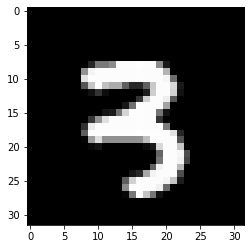

In [45]:
############################################################################################################ TESTING the Model
#테스트 이미지 한장만 샘플로 넣어서 이미지가 어떻게 학습되엇는지 결과 표출

image = X_train[index].squeeze()
plt.imshow(image, cmap="gray")

sample = X_train[index]
sample = sample[np.newaxis]
print(sample.shape)

def one_feed_sampling_test(X_data, index):
    sess = tf.get_default_session()
    raw_labels = sess.run(logits, feed_dict = {x: sample})
    predict_labels = sess.run(tf.argmax(raw_labels,1))

    return raw_labels, predict_labels

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    raw_labels, predict_labels = one_feed_sampling_test(X_train, index)
    print("RESULT(LABELS): ", raw_labels.squeeze())
    print("PREDICT: ",predict_labels.squeeze())

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.987


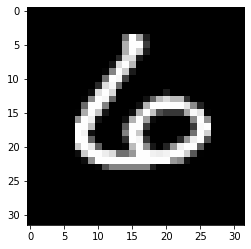

In [36]:
############################################################################################################ Evaluate the Model
#TEST SET ALL EVALUATE

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))